# Artificial Neural Network Training

This is a generalised script used to train a simple artificial neural network for the reconstruction process of EIT from the simualted data.


10 hidden layer neurons: Loss = 

In [0]:
input_data_name = '50k_32_c_pureElemData_input_data.csv'
output_data_name = '50k_32_c_pureElemData_output_data.csv'

data_path = '/content/gdrive/My Drive/Colab Notebooks/data/'
save_path = '/content/gdrive/My Drive/Colab Notebooks/Networks/ANN/SGD_optimized/'

P = 256 #output pixels
hidden_layer_neurons = 20;

output_network_name = 'b2c_32_256_'+str(hidden_layer_neurons)+'_'+str(P)+'_pureElem';


### Connect to the google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Import dependencies

In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import io
import matplotlib.pyplot as plt
import time

from sklearn import preprocessing

Using TensorFlow backend.


### Load the Data

In [0]:
in_df = pd.read_csv(data_path+input_data_name, delimiter=',', prefix="Trial", skiprows=0, header=None)
out_df = pd.read_csv(data_path+output_data_name, delimiter=',', prefix="Trial", skiprows=0, header=None)



input_data = in_df.values
output_data = out_df.values


In [0]:
# mc = ModelCheckpoint('content/gdrive/My Drive/Colab Notebooks/networks/best_nonoise_208_10_256.h5',
#                       monitor='val_acc', mode= 'max',
#                       verbose=0, save_best_only = True)


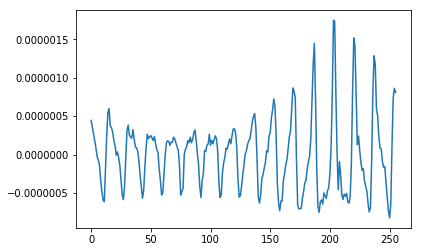

In [5]:
plt.plot(input_data[3,:])

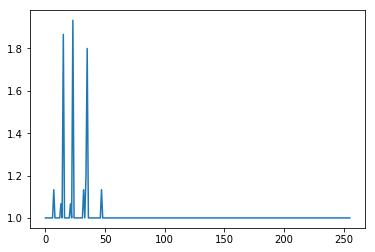

In [6]:
plt.plot(output_data[3,:])

In [15]:
es = EarlyStopping(monitor='loss', mode = 'min', verbose = 1, patience = 60, restore_best_weights=True)

#Optimizers
nadam = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=True)
adagrad = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0);

# Architecture
l0 = tf.keras.layers.Dense(units=256, activation='relu', input_dim=256)  
l1 = tf.keras.layers.Dense(units=hidden_layer_neurons, activation='relu')
l2 = tf.keras.layers.Dense(units=P, activation = 'linear')
model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss='mean_squared_error', optimizer=adam)

t_start = time.time();

history = model.fit(input_data, output_data,
                    shuffle=True, 
                    validation_split = 0.15,
                    epochs=1000,
                    callbacks= [es],
                    verbose=2 )

t_elapsed = time.time() - t_start;

print("Completed Training in: %2.2fs" %(t_elapsed))

Train on 42500 samples, validate on 7500 samples
Epoch 1/1000
42500/42500 - 4s - loss: 0.0692 - val_loss: 0.0240
Epoch 2/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0240
Epoch 3/1000
42500/42500 - 3s - loss: 0.0240 - val_loss: 0.0240
Epoch 4/1000
42500/42500 - 3s - loss: 0.0240 - val_loss: 0.0240
Epoch 5/1000
42500/42500 - 3s - loss: 0.0240 - val_loss: 0.0241
Epoch 6/1000
42500/42500 - 3s - loss: 0.0240 - val_loss: 0.0240
Epoch 7/1000
42500/42500 - 3s - loss: 0.0240 - val_loss: 0.0240
Epoch 8/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0240
Epoch 9/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0242
Epoch 10/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0240
Epoch 11/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0240
Epoch 12/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0239
Epoch 13/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0239
Epoch 14/1000
42500/42500 - 3s - loss: 0.0239 - val_loss: 0.0240
Epoch 15/1000
42500/42500 - 3s - loss: 0.0239 - va

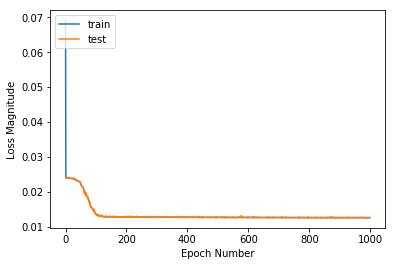

In [16]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

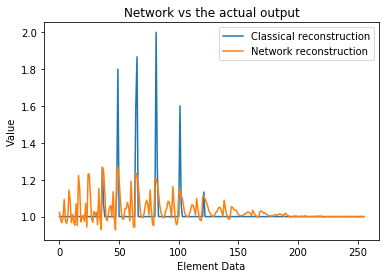

In [17]:
x = 5

eval_input = np.array([input_data[x, :]])

net1_out = model.predict(eval_input).T
# actual_output = np.array([output_data[x, :]]).T

# diff = net1_out-actual_output

plt.title('Network vs the actual output')
plt.xlabel('Element Data')
plt.ylabel('Value')
plt.plot(output_data[x,:])
plt.plot(net1_out)
plt.legend(['Classical reconstruction', 'Network reconstruction'], loc = 'upper right');

In [0]:
diff = net1_out-actual_output

plt.title('Difference in network and classical network')
plt.xlabel('Element Data')
plt.ylabel('Value')
plt.plot(diff)

## Save Model

In [0]:
model.save(save_path+output_network_name+'.h5')